/var/folders/mt/mgjpxf_n213bh1qtxs3w7kr40000gn/T/ipykernel_16656/3761718221.py:6: DtypeWarning: Columns (3,4,5,7,8,9,10,13,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Race_Details_v.1.1.0.csv')


✓ Dataset loaded: 1048575 entries
Original Data:
   raceId    year  round grandPrixId  circuitId circuitType  \
0   664.0  2001.0    1.0   australia  melbourne      STREET   
1   664.0  2001.0    1.0   australia  melbourne      STREET   
2   664.0  2001.0    1.0   australia  melbourne      STREET   
3   664.0  2001.0    1.0   australia  melbourne      STREET   
4   664.0  2001.0    1.0   australia  melbourne      STREET   

   positionDisplayOrder positionText               driverId  \
0                   1.0            1     michael-schumacher   
1                   2.0            2        david-coulthard   
2                   3.0            3     rubens-barrichello   
3                   4.0            4          nick-heidfeld   
4                   5.0            5  heinz-harald-frentzen   

              driverName  ... positionsGained  changeInPosition  pitStops  \
0     Michael Schumacher  ...             0.0               0.0       1.0   
1        David Coulthard  ...          

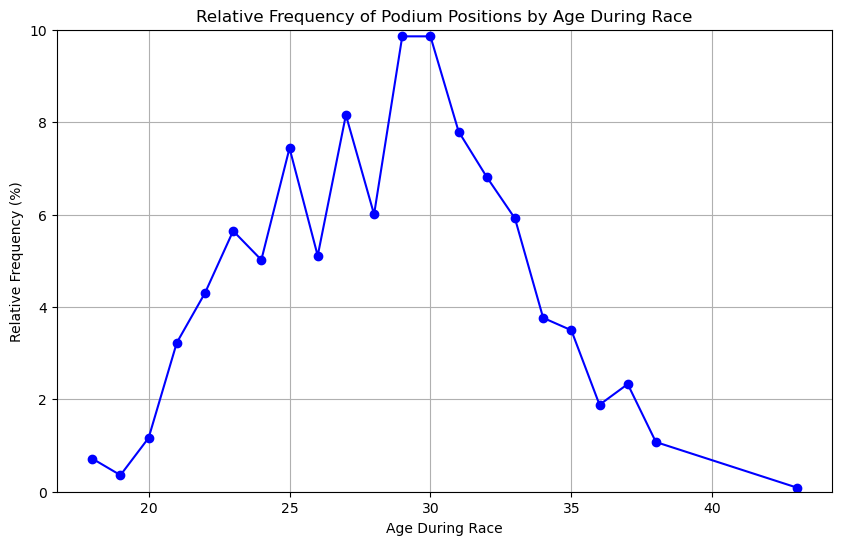

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('Race_Details_v.1.1.0.csv')
    print(f"✓ Dataset loaded: {len(df)} entries")
except:
    try:
        df = pd.read_csv('Race Details.csv')
        print(f"✓ Dataset loaded (alternate): {len(df)} entries")
    except:
        print("✗ Dataset not found")
        df = None

# Display first few rows of original data
print("Original Data:")
print(df.head())

# Filter rows where 'podiumPosition' is True
filtered_df = df[df['podiumPosition'] == True]

# Extract only the column 'ageDuringRace' and 'podiumPosition'
filtered_df = filtered_df[['ageDuringRace', 'podiumPosition']]

# Display first few rows of filtered data
print("\nFiltered Data (only True podium positions):")
print(filtered_df.head())

# Group by 'ageDuringRace' and count podium positions
grouped = filtered_df.groupby('ageDuringRace')['podiumPosition'].count().reset_index()
grouped.columns = ['ageDuringRace', 'podium_count']

# Calculate relative frequency as percentage
total_podiums = grouped['podium_count'].sum()
grouped['relative_frequency'] = (grouped['podium_count'] / total_podiums) * 100

# Display grouped data
print("\nGrouped Data with Relative Frequency (%):")
print(grouped)

# Plot line graph with relative frequency
plt.figure(figsize=(10,6))
plt.plot(grouped['ageDuringRace'], grouped['relative_frequency'], marker='o', linestyle='-', color='b')
plt.title("Relative Frequency of Podium Positions by Age During Race")
plt.xlabel("Age During Race")
plt.ylabel("Relative Frequency (%)")
plt.ylim(0, 10)  # Ensure y-axis goes from 0 to 10%
plt.grid(True)
plt.show()

/var/folders/mt/mgjpxf_n213bh1qtxs3w7kr40000gn/T/ipykernel_16656/67991893.py:6: DtypeWarning: Columns (3,4,5,7,8,9,10,13,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Race_Details_v.1.1.0.csv')


✓ Dataset loaded: 1048575 entries


/var/folders/mt/mgjpxf_n213bh1qtxs3w7kr40000gn/T/ipykernel_16656/67991893.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['podiumPosition'] = df_clean['podiumPosition'].astype(bool)


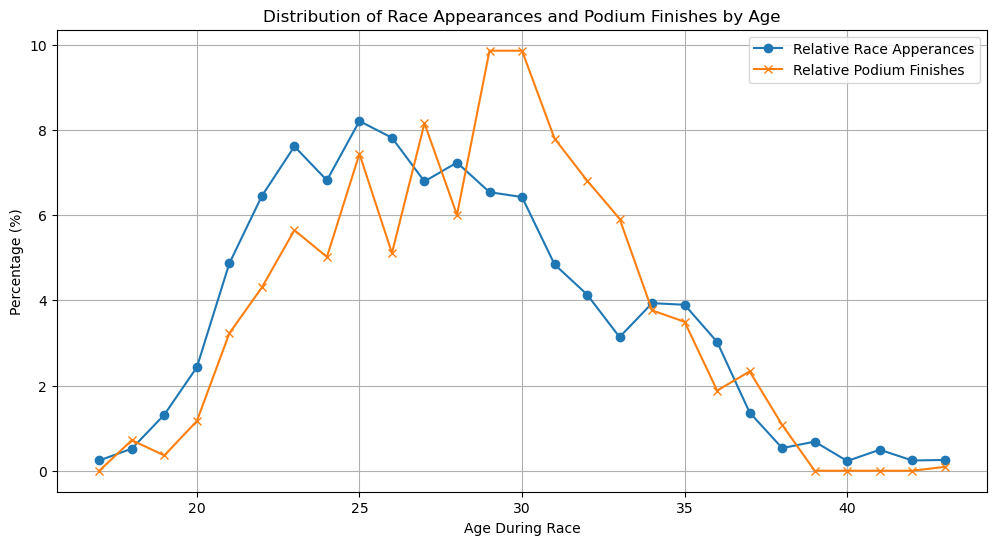

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('Race_Details_v.1.1.0.csv')
    print(f"✓ Dataset loaded: {len(df)} entries")
except:
    try:
        df = pd.read_csv('Race Details.csv')
        print(f"✓ Dataset loaded (alternate): {len(df)} entries")
    except:
        print("✗ Dataset not found")
        df = None

# Drop rows where 'ageDuringRace', 'podiumPosition', or 'raceId' is blank
df_clean = df.dropna(subset=['ageDuringRace', 'podiumPosition', 'raceId'])

# Ensure podiumPosition is boolean
df_clean['podiumPosition'] = df_clean['podiumPosition'].astype(bool)

# Count of raceId per ageDuringRace
race_count = df_clean.groupby('ageDuringRace')['raceId'].count()

# Count of podiumPosition == True per ageDuringRace
podium_count = df_clean[df_clean['podiumPosition'] == True].groupby('ageDuringRace')['podiumPosition'].count()

# Grand totals
grand_total_races = race_count.sum()
grand_total_podiums = podium_count.sum()

# Combine into a single DataFrame
grouped_counts = pd.DataFrame({
    'ageDuringRace': race_count.index,
    'Race Count': race_count.values,
    'Podium True Count': podium_count.reindex(race_count.index, fill_value=0).values
})

# Convert counts to percentages
grouped_counts['Race Count (% of Grand Total Races)'] = (grouped_counts['Race Count'] / grand_total_races) * 100
grouped_counts['Podium True Count (% of Grand Total Podiums)'] = (grouped_counts['Podium True Count'] / grand_total_podiums) * 100


# Plot overlapping line graph of percentages
plt.figure(figsize=(12,6))
plt.plot(grouped_counts['ageDuringRace'], grouped_counts['Race Count (% of Grand Total Races)'], marker='o', label='Relative Race Apperances') 
plt.plot(grouped_counts['ageDuringRace'], grouped_counts['Podium True Count (% of Grand Total Podiums)'], marker='x', label='Relative Podium Finishes')
plt.xlabel('Age During Race')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Race Appearances and Podium Finishes by Age')
plt.legend()
plt.grid(True)
plt.show() 




/var/folders/mt/mgjpxf_n213bh1qtxs3w7kr40000gn/T/ipykernel_16656/2937120366.py:6: DtypeWarning: Columns (3,4,5,7,8,9,10,13,16,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Race_Details_v.1.1.0.csv')


✓ Dataset loaded: 1048575 entries


<Figure size 5000x3000 with 0 Axes>

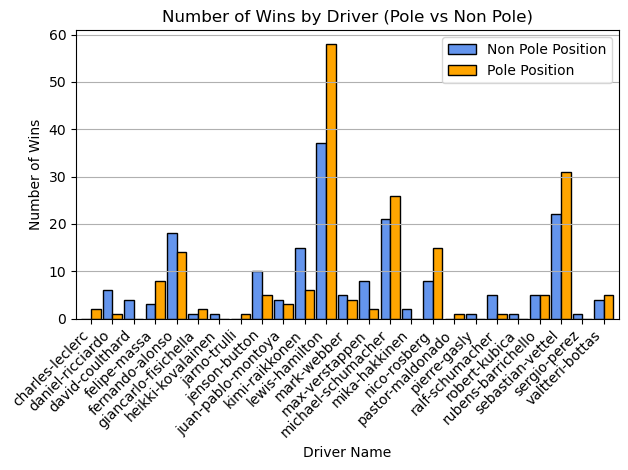

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
try:
    df = pd.read_csv('Race_Details_v.1.1.0.csv')
    print(f"✓ Dataset loaded: {len(df)} entries")
except:
    try:
        df = pd.read_csv('Race Details.csv')
        print(f"✓ Dataset loaded (alternate): {len(df)} entries")
    except:
        print("✗ Dataset not found")
        df = None

# Ensure correct data types
df['positionDisplayOrder'] = pd.to_numeric(df['positionDisplayOrder'], errors='coerce')
df['polePosition'] = df['polePosition'].astype(str).str.upper() == "TRUE"

# Filter rows
f_filtered_df = df[(df['positionDisplayOrder'] == 1) & (df['polePosition'] == False)]
t_filtered_df = df[(df['positionDisplayOrder'] == 1) & (df['polePosition'] == True)]

# Count by driverId
f_counts = f_filtered_df['driverId'].value_counts()
t_counts = t_filtered_df['driverId'].value_counts()

# Combine into one DataFrame
combined_df = pd.DataFrame({
    'Non Pole Position': f_counts,
    'Pole Position': t_counts
}).fillna(0).astype(int)

# Create a map from driverID -> driverName
driver_map = df.drop_duplicates(subset=['driverId']).set_index('driverId')['driverName']

# Create a new driverName Column from the index
combined_df['driverName'] = combined_df.index.map(driver_map)

# Sort by driverName 
combined_df.sort_values(by='driverName', ascending=True)

# Plot grouped bar chart with wider bars
plt.figure(figsize=(50,30))
combined_df.plot(kind='bar', width=0.9, color=['cornflowerblue', 'orange'], edgecolor='black')
plt.title("Number of Wins by Driver (Pole vs Non Pole)")
plt.xlabel("Driver Name")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()